In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [1 2 0 1 9 6 5 0 3 9]


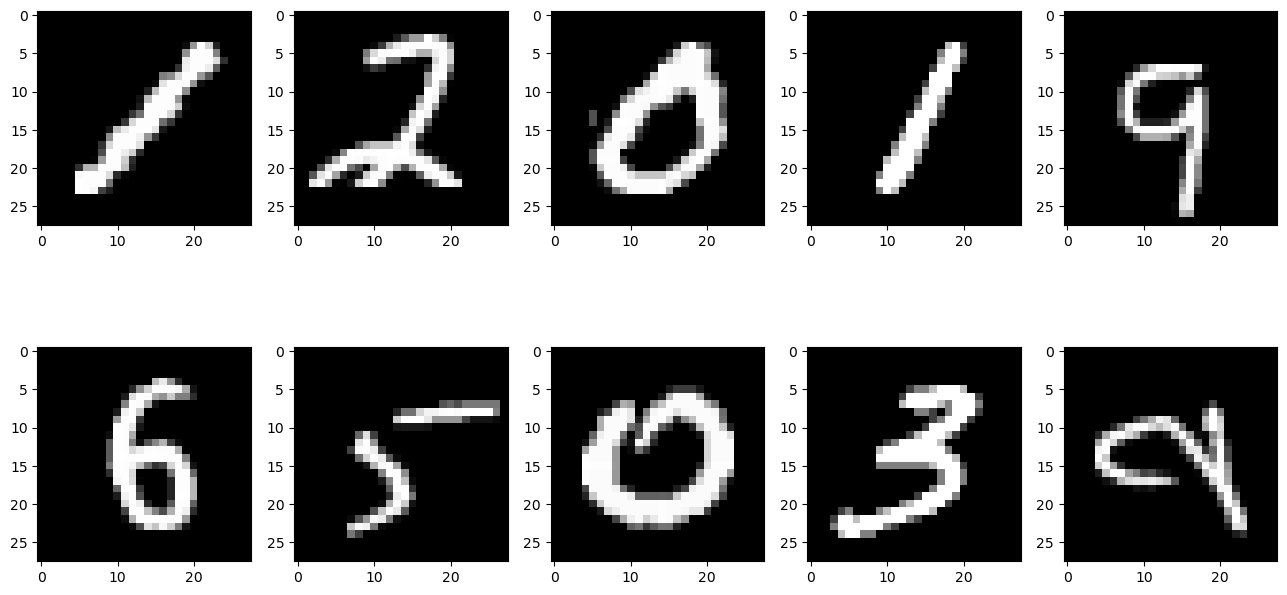

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 60970 (238.16 KB)
Trainable params: 60970 

Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2860 - accuracy: 0.9132
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1242 - accuracy: 0.9619
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0929 - accuracy: 0.9712
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0771 - accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9798
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0544 - accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0485 - accuracy: 0.9844
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0417 - accuracy: 0.9867
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0380 - accuracy: 0.9877
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.035

Plot the loss and accuracy graphs

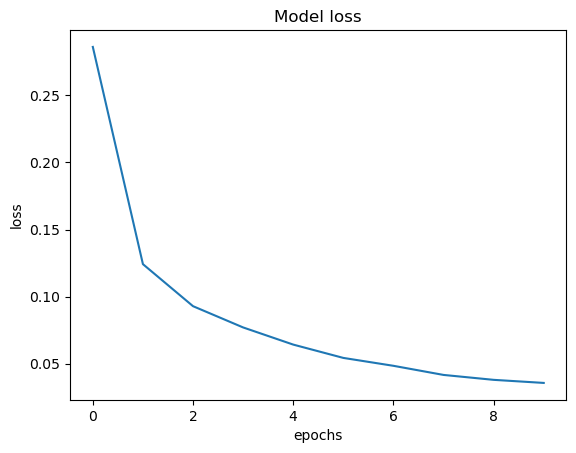

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

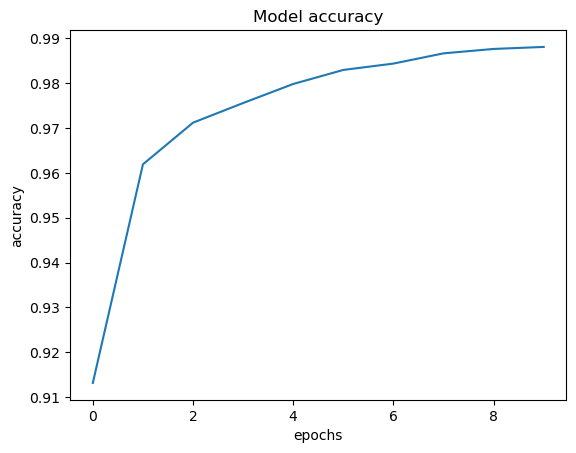

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 1ms/step - loss: 0.1062 - accuracy: 0.9723
Loss of the Test dataset is: 0.10620095580816269
Accuracy of the test dataset is: 0.9722999930381775


Save the model weights

In [11]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

313/313 [==============================] - 0s 1ms/step


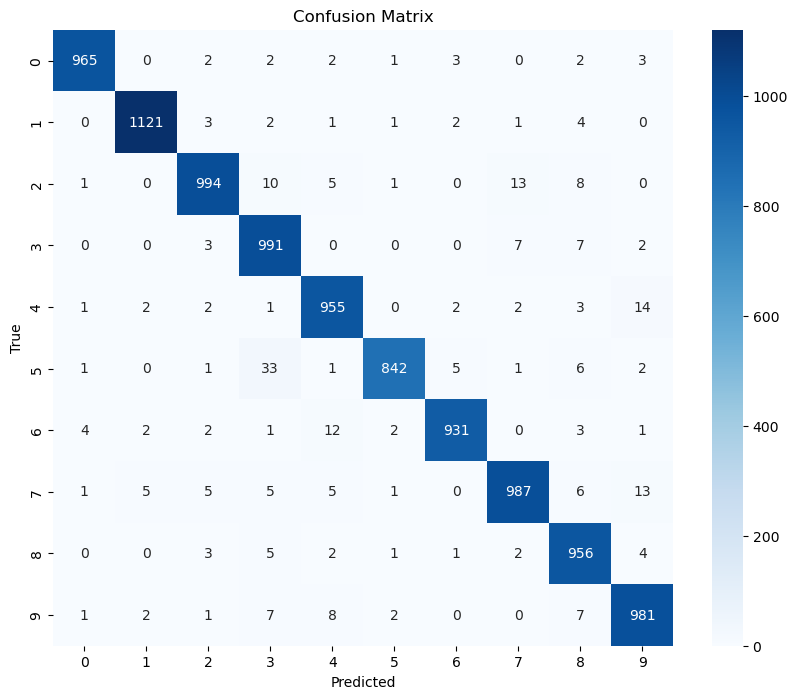

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(new_test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(new_test_target, axis=1)

confusion = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()